## Aim : Maximize agricultural yield by recommending appropriate crops

### Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

#### You can find the dataset at https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset?resource=download

### Context This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

#### Data fields 
N - ratio of Nitrogen content in soil \
P - ratio of Phosphorous content in soil \
K - ratio of Potassium content in soil \
temperature - temperature in degree Celsius\ 
humidity - relative humidity in % \
ph - ph value of the soil\
rainfall - rainfall in mm 

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.linear_model as ln

In [2]:
cr_df = pd.read_csv("Crop_recommendation.csv")
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
cr_df.describe() # Get Basic Summary of the data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


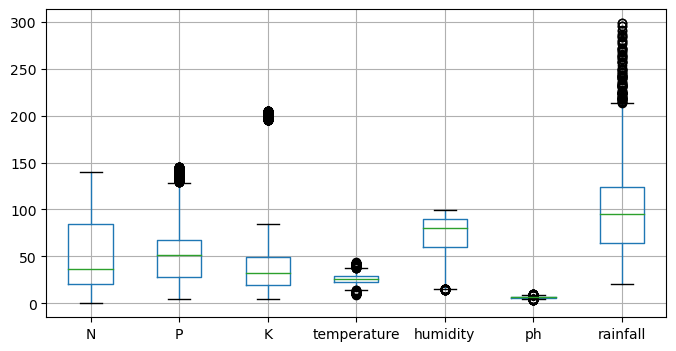

In [4]:
plt.figure(figsize=(8,4))
cr_df.boxplot() # Check Data Distribution and outliers
plt.show()

In [5]:
# Check Label Values
label_array = cr_df.label.unique() # we have equally distributed data 
label_array

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

C:\Users\visha\AppData\Local\Temp\ipykernel_18604\2176170461.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cr_df.corr())


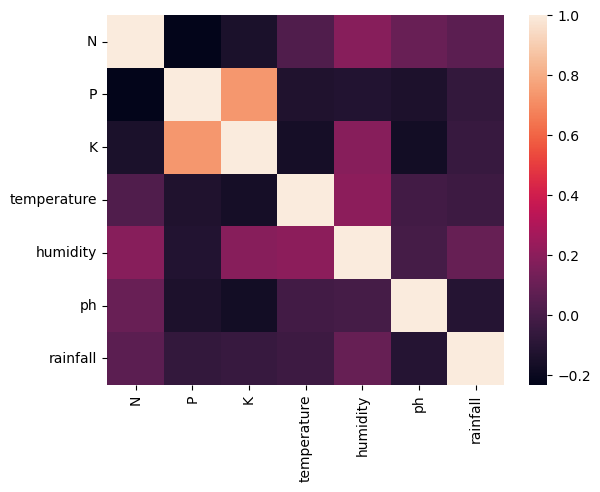

In [6]:
# Next perform Basic EDA between labels and other paramenters
sns.heatmap(cr_df.corr())
plt.show()
# From this Heat map we can see that Phosphorous and Potassium are highly correlated. 
# We can check their relationsip with labels before deciding to remove either 1 of them


In [7]:
# Next lets plot average/min/max values of all predictors against the labels(Response Variable)
for jj in label_array:
    cr_df.plot


In [13]:
cr_df.plot(kind = 'bar',cr_df.loc[:,1:-2])

SyntaxError: positional argument follows keyword argument (2440022864.py, line 1)

<Axes: >

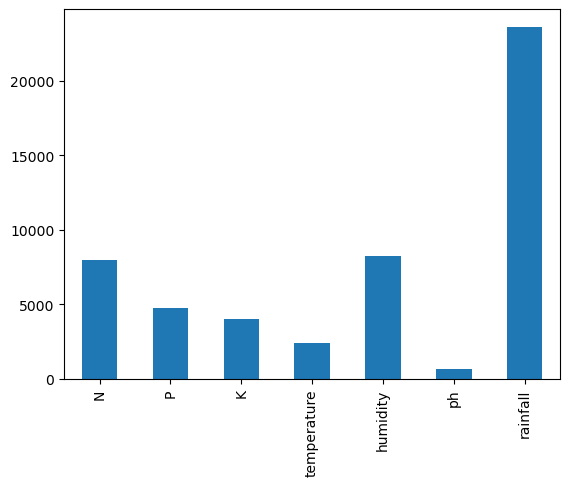

In [28]:
# Example Logic
cr_df[(cr_df.label=='rice')].iloc[:,:-1].sum().plot(kind = "bar")

<BarContainer object of 7 artists>

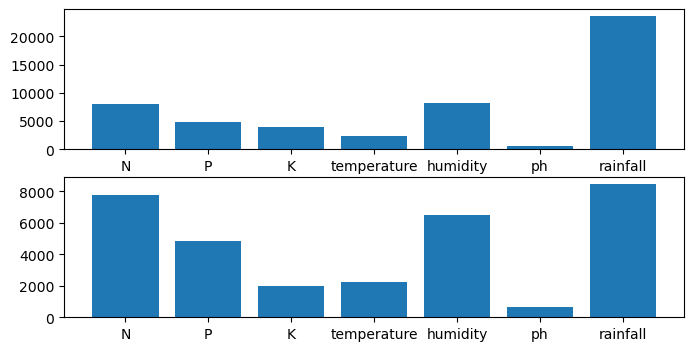

In [92]:

plt.subplot(2,1,1)
plt.bar(x,height=hgt)





In [8]:
# Now create a matrix of such plots using a for loop and also add labels and titiles.
subplot_len = len(label_array)
data = cr_df[(cr_df.label=='rice')].iloc[:,:-1].sum()
data = dict(data)
x = data.keys()

plt.figure(figsize=(40,4))
for label_id,label_name in enumerate(label_array):
    plt.subplot(subplot_len,1,label_id)
    plt.bar(x,height=cr_df[(cr_df.label==label_name)].iloc[:,:-1].sum())

ValueError: num must be an integer with 1 <= num <= 22, not 0

<Figure size 4000x400 with 0 Axes>

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064
2196,99,15,27,27.417112,56.636362,6.086922
2197,118,33,30,24.131797,67.225123,6.362608
2198,117,32,34,26.272418,52.127394,6.758793


In [ ]:
# Check Multicollinearity and remove parameters
